<a href="https://colab.research.google.com/github/RandhirGawai/Dog-Behavior/blob/main/DogBehavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
from keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE=[224,224]
train_path='/content/drive/MyDrive/LnB project/images/train'
test_path='/content/drive/MyDrive/LnB project/images/test'


In [4]:
inception = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


80134624/80134624 [==============================] - 0s 0us/step


In [5]:
for layer in inception.layers:
  layer.trainable=False

In [6]:
folders=glob('/content/drive/MyDrive/LnB project/images/train/*')
folders 

['/content/drive/MyDrive/LnB project/images/train/happy',
 '/content/drive/MyDrive/LnB project/images/train/relaxed',
 '/content/drive/MyDrive/LnB project/images/train/angry',
 '/content/drive/MyDrive/LnB project/images/train/sad']

In [7]:
x=Flatten()(inception.output)
prediction=Dense(len(folders),activation='softmax')(x)

model=Model(inputs=inception.input,outputs=prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:

from tensorflow.keras.layers import MaxPooling2D

### create model from scratch using cnn
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=3))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(4,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/LnB project/images/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2129 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/LnB project/images/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 412 images belonging to 4 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
67/67 [==============================] - 502s 7s/step - loss: 1.2513 - accuracy: 0.4932 - val_loss: 1.4921 - val_accuracy: 0.2718
Epoch 2/15
67/67 [==============================] - 89s 1s/step - loss: 1.2294 - accuracy: 0.4969 - val_loss: 1.6139 - val_accuracy: 0.2718
Epoch 3/15
67/67 [==============================] - 89s 1s/step - loss: 1.2222 - accuracy: 0.4969 - val_loss: 1.4362 - val_accuracy: 0.2718
Epoch 4/15
67/67 [==============================] - 89s 1s/step - loss: 1.2158 - accuracy: 0.4969 - val_loss: 1.5113 - val_accuracy: 0.2718
Epoch 5/15
67/67 [==============================] - 89s 1s/step - loss: 1.2000 - accuracy: 0.4984 - val_loss: 1.6637 - val_accuracy: 0.2718
Epoch 6/15
67/67 [==============================] - 89s 1s/step - loss: 1.2025 - accuracy: 0.4965 - val_loss: 1.5295 - val_accuracy: 0.2767
Epoch 7/15
67/67 [==============================] - 89s 1s/step - loss: 1.1825 - accuracy: 0.5016 - val_loss: 1.6534 - val_accuracy: 0.2816
Epoch 8/15
67/67 [=

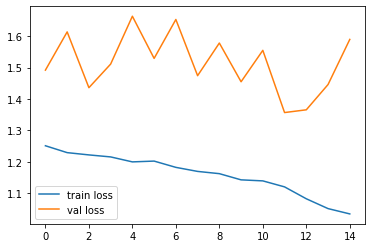

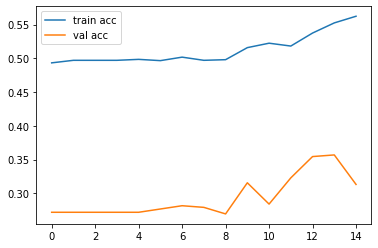

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig("LossVal_loss")

plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [16]:
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [17]:
y_pred=model.predict(test_set)
y_pred

13/13 [==============================] - 6s 401ms/step


array([[0.4179968 , 0.23985139, 0.27151987, 0.07063194],
       [0.82549125, 0.02070615, 0.14216958, 0.01163295],
       [0.45573068, 0.05818328, 0.41868082, 0.0674052 ],
       ...,
       [0.88560724, 0.05511244, 0.03427885, 0.02500135],
       [0.49417803, 0.1794531 , 0.07316271, 0.2532061 ],
       [0.8129244 , 0.01139387, 0.07663445, 0.09904728]], dtype=float32)

In [18]:
import numpy as np
y_pred=np.argmax(y_pred,axis=0)
y_pred

array([ 37,  49, 106,  47])

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model=load_model('model_vgg19.h5')

In [33]:
img=image.load_img('/content/drive/MyDrive/LnB project/images/test/sad/124443989_2894cb21f9_b.jpg',target_size=(224,224))


In [34]:
img=image.load_img('/content/drive/MyDrive/LnB project/images/train/relaxed/1491062258_b77142edf5_b.jpg',target_size=(224,224))

In [35]:
x=image.img_to_array(img)
x

array([[[119., 114.,  74.],
        [113., 106.,  62.],
        [110., 102.,  53.],
        ...,
        [ 43.,  43.,  51.],
        [ 33.,  34.,  39.],
        [ 26.,  27.,  32.]],

       [[103.,  98.,  60.],
        [104.,  97.,  55.],
        [107.,  96.,  50.],
        ...,
        [ 23.,  23.,  31.],
        [ 15.,  16.,  21.],
        [ 23.,  24.,  29.]],

       [[113., 105.,  69.],
        [114., 105.,  66.],
        [116., 103.,  61.],
        ...,
        [ 21.,  21.,  31.],
        [ 32.,  32.,  40.],
        [ 13.,  13.,  21.]],

       ...,

       [[ 26.,  33.,  17.],
        [ 28.,  40.,  20.],
        [ 39.,  54.,  33.],
        ...,
        [113., 103.,  91.],
        [109.,  99.,  87.],
        [105.,  95.,  83.]],

       [[ 17.,  24.,   8.],
        [ 24.,  33.,  14.],
        [ 18.,  31.,  11.],
        ...,
        [111., 103.,  90.],
        [111., 103.,  90.],
        [106.,  98.,  85.]],

       [[ 22.,  29.,  13.],
        [ 18.,  27.,   8.],
        [ 31.,  

In [36]:
x.shape

(224, 224, 3)

In [37]:
x=x/255

In [38]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

1/1 [==============================] - 0s 469ms/step


array([[4.1080056e-29, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [40]:
preds=np.argmax(model.predict(img_data),axis=1)


1/1 [==============================] - 0s 34ms/step


In [41]:
preds

array([3])

In [42]:
if preds==0:
  preds="Dog is Angry"
elif preds==1:
  preds="Dog is Happy"
elif preds==2:
  preds="Dog is Relaxed"
else:
  preds="Dog is Sad"

preds

'Dog is Sad'